<a href="https://colab.research.google.com/github/shubhi/diabetic-retinopathy-detection/blob/main/01_diabetic_retinopathy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages**

In [1]:
!pip install kaggle

# **Libraries**

In [84]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# **Data Processing**
**Kaggle Dataset**: Diabetic Retinopathy 224x224 Gaussian Filtered

**Link**: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered


## **01 Load Data from Kaggle**

In [11]:
import os

if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [12]:
api = KaggleApi()
api.authenticate()

In [13]:
dataset_name = "sovitrath/diabetic-retinopathy-224x224-gaussian-filtered"
api.dataset_download_files(dataset_name, unzip=True)

In [64]:
df = pd.read_csv("train.csv")
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


## **02 Generate Class Labels**

In [79]:
class_labels = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

class_labels_binary = {
    0: '0' ,
    1: '1' ,
    2: '1' ,
    3: '1' ,
    4: '1' ,
    5: '1' ,
}

classes = len(class_labels)

In [65]:
df = df.rename(columns={"id_code": "img_code", "diagnosis": "level"})

In [80]:
df['binary'] = df['level'].map(class_labels_binary.get)
df['diagnosis'] =  df['level'].map(class_labels.get)

In [81]:
df.head()

,img_code,level,binary,diagnosis
0,000c1434d8d7,2,1,Moderate
1,001639a390f0,4,1,Proliferate_DR
2,0024cdab0c1e,1,1,Mild
3,002c21358ce6,0,0,No_DR
4,005b95c28852,0,0,No_DR


## **03 Data Distribution**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   img_code   3662 non-null   object
 1   level      3662 non-null   int64 
 2   binary     3662 non-null   object
 3   diagnosis  3662 non-null   object
dtypes: int64(1), object(3)
memory usage: 114.6+ KB


In [75]:
print("Number of Classes: ", classes)
print("Class Distribution by diagnosis (binary):", df.groupby("binary").size())
print("Class Distribution by diagnosis (level):", df.groupby("level").size())

Number of Classes:  5
Class Distribution by diagnosis (binary): binary
0    1805
1    1857
dtype: int64
Class Distribution by diagnosis (level): level
0    1805
1     370
2     999
3     193
4     295
dtype: int64


<Axes: >

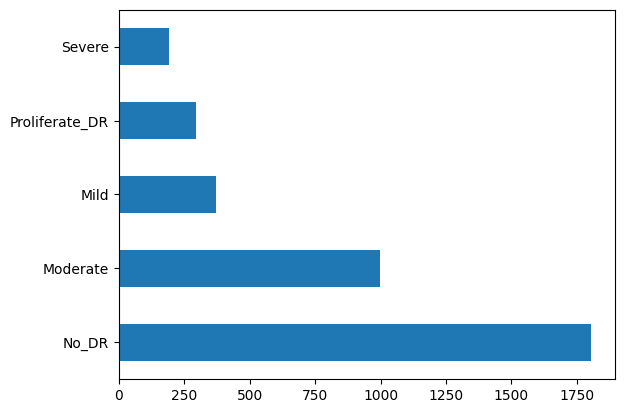

In [82]:
df['diagnosis'].value_counts().plot(kind='barh')

<Axes: >

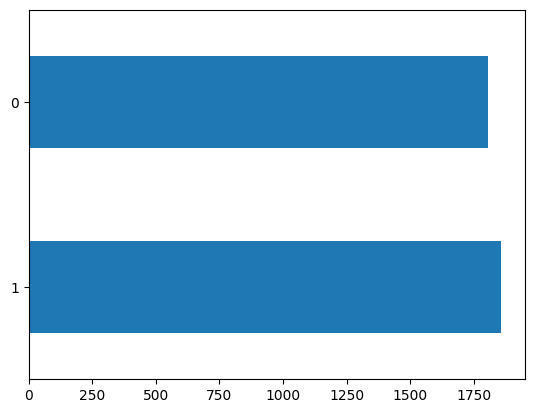

In [71]:
df['binary'].value_counts().plot(kind='barh')

## **04 Visualize images by level of diagnosis**

In [76]:
dir_images = "content/gaussian_filtered_images/gaussian_filtered_images"

In [87]:
def visualize_image_per_level(level):
    dir = dir_images + "/level"
    level_images = df.loc[df['diagnosis'] == level]['img_code'].values
    images = []
    for i in range(10):
        img = Image.open(level_images[i])
        img = img.resize((512, 512))
        images.append(np.array(img))
    images = np.concatenate(images, axis=1)
    plt.figure(figsize=(20, 40))
    plt.imshow(images)

for level in class_labels:
    visualize_image_per_level(class_labels[level])

FileNotFoundError: [Errno 2] No such file or directory: '002c21358ce6'

In [ ]:
# level 00_No_DR
images = []